<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/PCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.interpolate import griddata

In [37]:
shapefile_path = '/content/Total_area_2021.shp'
shape_gdf = gpd.read_file(shapefile_path)

In [38]:
file_path = '/content/PCP.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [39]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
lon = df['Longitude'].values
lat = df['Latitude'].values
parameter = df['pH'].values

In [40]:
grid_lon, grid_lat = np.meshgrid(np.linspace(min(lon), max(lon), 100),
                                 np.linspace(min(lat), max(lat), 100))
grid_parameter = griddata((lon, lat), parameter, (grid_lon, grid_lat), method='linear')

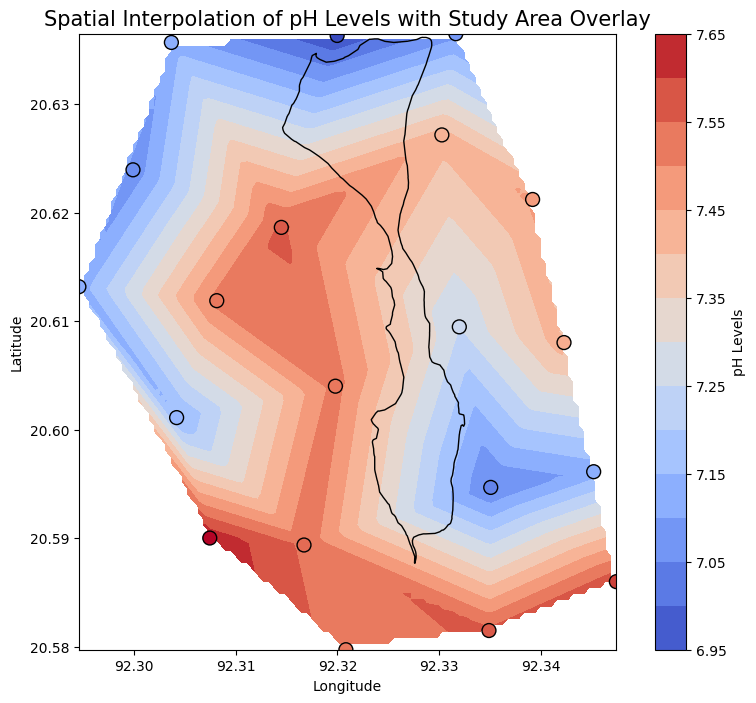

In [41]:
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, grid_parameter, cmap='coolwarm', levels=15)
shape_gdf.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
plt.scatter(lon, lat, c=parameter, cmap='coolwarm', edgecolor='black', s=100)

plt.colorbar(contour, label='pH Levels')
plt.title('Spatial Interpolation of pH Levels with Study Area Overlay', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()